## Описание проекта

Инвесторам, планирующим открыть заведение общественного питания в Москве, необходимо подготовить исследование рынка Москвы. Инвесторы еще не определились какое заведение откроют: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
Нужно найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

__Проект будет реализовывать в несколько шагов:__

1. Обзор данных
2. Предобработка данных
3. Анализ данных
4. Детализация исследования
5. Подготовка презентации

__Описание данных__

В распоряжении данные о заведениях общественного питания Москвы.

* name — название заведения;
* address — адрес заведения;
* category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* hours — информация о днях и часах работы;
* lat — широта географической точки, в которой находится заведение;
* lng — долгота географической точки, в которой находится заведение;
* rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    - и так далее;
* middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:    - 
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.    - 
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
* chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
* district — административный район, в котором находится заведение, например Центральный административный округ;
* seats — количество посадочных мест.

#### Обзор данных

In [1]:
! pip install folium

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings as wr
import json
import folium
from folium import Map, Choropleth

In [3]:
wr.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
try:
    df = pd.read_csv('C:/Users/crugl/Documents/Проекты/moscow_places.csv')
except:
    df = pd.read_csv('/datasets/moscow_places.csv')  

In [5]:
df.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                                  hours   lat   lng  rating  \
0                                ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                                ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00 55.89 37.53    4.60   
3                                ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                                ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0            NaN                            NaN              NaN   
1  выше среднего       Средний счёт:1500–1600 ₽         1,550.00   
2        средние         Средний счёт:от 1000 ₽         1,000.00   
3            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        средние         Средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0   4.00  
2                NaN      0  45.00  
3             170.00      0    NaN  
4                NaN      1 148.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB



В таблице информация о 8406 заведениях, среди них есть заведения входящие являющиеся сетевыми

### Предобработка данных

Предобработку начнём с пропусков. Посмотрим в каких столбцах есть пропуски

In [7]:
def processing (data):
    """
    Функция будет выводить информацию о явных дубликатах
    и пропусков в данных 
    """
    duplicated_sum = data.duplicated().sum()
    gap_sum = data.isna().sum()
    print(data.info())
    print()
    print('Количество явных дубликатов:', duplicated_sum)
    print('Количество пропусков:')
    print(gap_sum)

In [8]:
processing(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
na

Столбцы hours, price, avg_bill, middle_avg_bill, middle_coffee_cup, seats содержат пропуски, но восполнить их качественными данными невозможно, поэтому пропуски оставляем.

Явных дубликатов в таблице не обнаружено.

Теперь создадим столбец street с названиями улиц из столбца с адресом.

In [9]:
df['street'] = df['address'].str.split(', ').str[1]

Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

* логическое значение True — если заведение работает ежедневно и круглосуточно;
* логическое значение False — в противоположном случае.

In [10]:
def boolen_24_7 (column):
    """Функция категоризирует данные о режиме работы заведений"""
    if column == 'ежедневно, круглосуточно':
        return True
    return False

In [11]:
df['is_24_7'] = df['hours'].apply(boolen_24_7)

### Анализ данных

__Количество заведений по категориям__

Посмотрим какие категории заведений представлены в данных

In [12]:
df.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                                  hours   lat   lng  rating  \
0                                ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                                ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00 55.89 37.53    4.60   
3                                ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                                ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0            NaN                            NaN              NaN   
1  выше среднего       Средний счёт:1500–1600 ₽         1,550.00   
2        средние         Средний счёт:от 1000 ₽         1,000.00   
3            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        средние         Средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats                   street  is_24_7  
0                NaN      0    NaN            улица Дыбенко    False  
1                NaN      0   4.00            улица Дыбенко    False  
2                NaN      0  45.00       Клязьминская улица    False  
3             170.00      0    NaN  улица Маршала Федоренко    False  
4                NaN      1 148.00      Правобережная улица    False

In [13]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale=1.4)

[Text(0.5, 0, 'Категория'),
 Text(0, 0.5, 'Количетсво'),
 Text(0.5, 1.0, 'Количество заведений в Москве по категориям')]

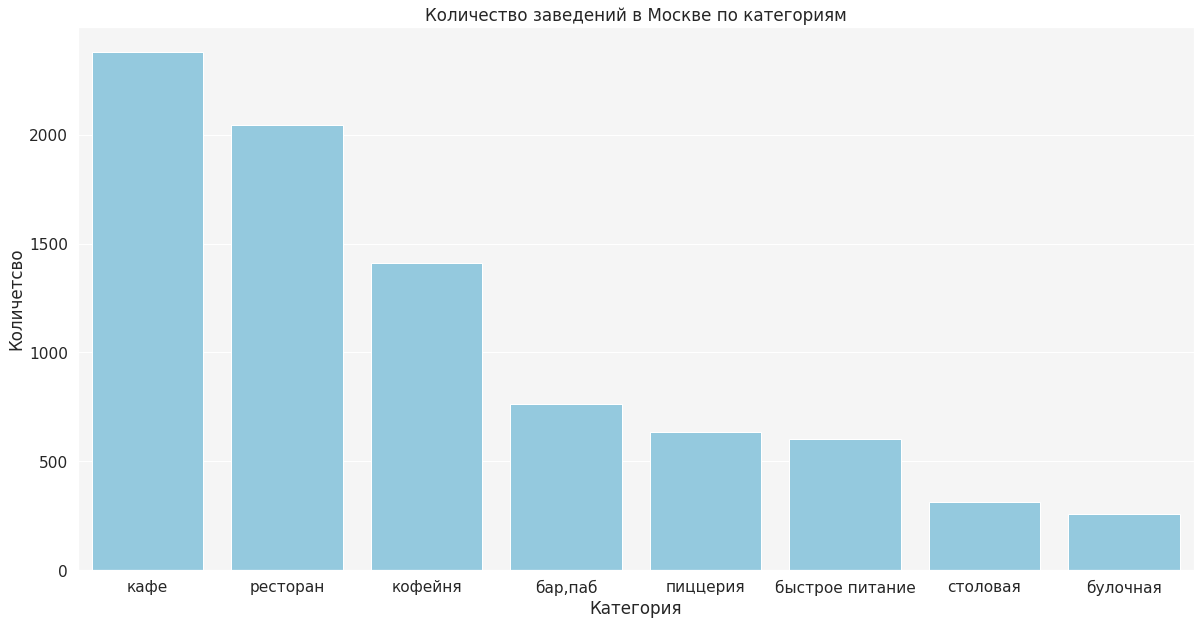

In [14]:
( 
    sns.countplot(data=df, x='category', 
                order=df['category'].value_counts().index,
                color='#87CEEB')
    .set(xlabel='Категория',
         ylabel='Количетсво',
         title='Количество заведений в Москве по категориям')
)    

Выделим ТОП-3: кафе, рестораны, кофейни.

__Количество посадочных мест__

Посмотрим на количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее.

Рассмотрим абсолютные и средние значения.

In [15]:
(
    df.groupby('category')['seats']
    .agg(['sum', 'mean'])
    .reset_index()
    .rename(columns={'category':'Категория','sum':'Сумма', 
                     'mean':'Среднее количество'})
    .sort_values('Среднее количество', ascending=False)
)

Категория      Сумма  Среднее количество
0          бар,паб  58,281.00              124.53
6         ресторан 154,869.00              121.94
4          кофейня  83,511.00              111.20
7         столовая  16,359.00               99.75
2  быстрое питание  34,513.00               98.89
3             кафе 118,770.00               97.51
5         пиццерия  40,350.00               94.50
1         булочная  13,229.00               89.39

[Text(0.5, 0, 'Категоря'),
 Text(0, 0.5, 'Количество посадочных мест'),
 Text(0.5, 1.0, 'Количество посадочных мест в зависимости от категории')]

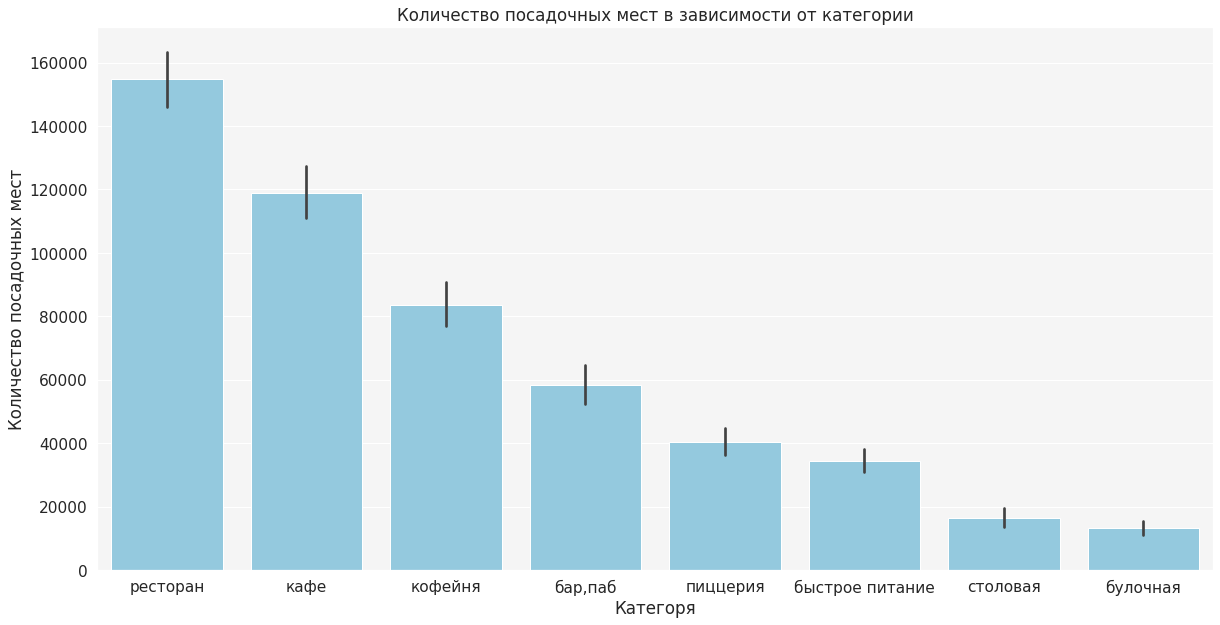

In [16]:
(
    sns.barplot(data=df, x='category', y='seats', 
                estimator=sum, 
                order=df.groupby('category')['seats'].sum()
                        .sort_values(ascending=False).index,
                color='#87CEEB')
    .set(xlabel='Категоря',
         ylabel='Количество посадочных мест',
         title='Количество посадочных мест в зависимости от категории')
       
)

В ресторанах находится больше всего посадочных мест, но нужно взглянуть и на средние значения

[Text(0.5, 0, 'Категоря'),
 Text(0, 0.5, 'Среднее количество посадочных мест'),
 Text(0.5, 1.0, 'Среднее количество посадочных мест в зависимости от категории')]

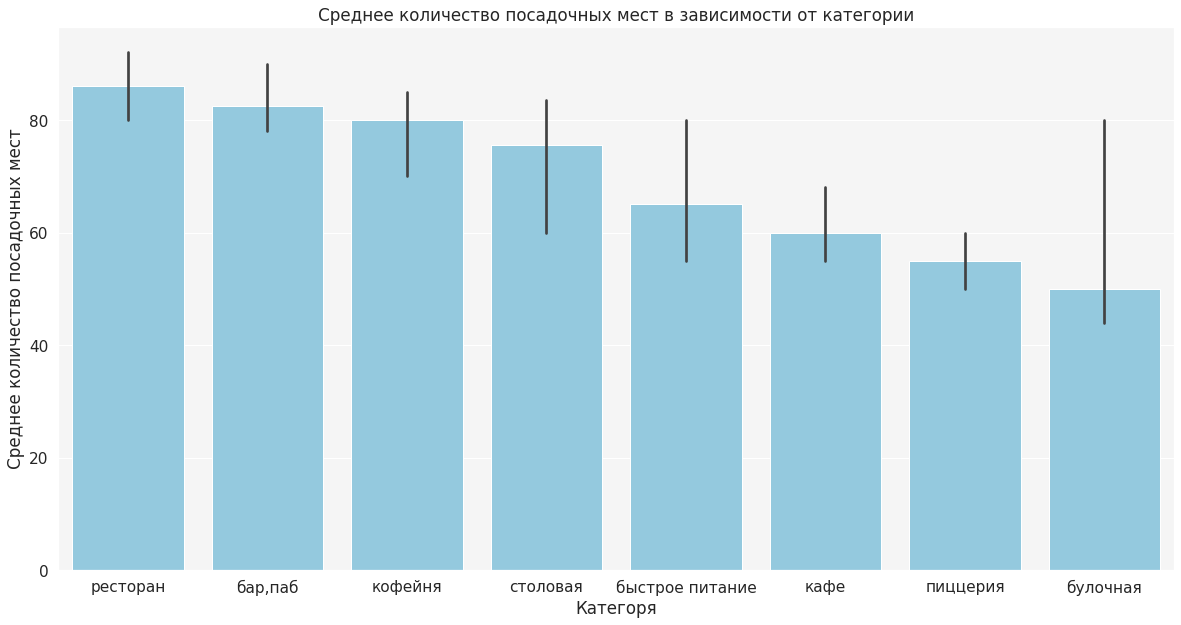

In [17]:
(
    sns.barplot(data=df, x='category', y='seats', 
                estimator=np.median,
                order=df.groupby('category')['seats'].median()
                        .sort_values(ascending=False).index,
                color='#87CEEB')
    .set(xlabel='Категоря',
         ylabel='Среднее количество посадочных мест',
         title='Среднее количество посадочных мест в зависимости от категории')
       
)

В среднем в барах/пабах находится больше посадочных мест, чем в других категориях заведений

__Соотношение сетевых и несетевых заведений__

Для начала сгруппируем данные

In [18]:
chain_count = df.groupby('chain', as_index=False)['name'].count().rename(columns={'chain':'сеть', 'name':'количество'})
chain_count['сеть'] = chain_count['сеть'].map({0:'несетевые заведения', 1:'сетевые заведения'})

In [19]:
px.pie(chain_count, values='количество', 
       names='сеть', title='Доля сетевых и несетевых заведений')

В Москве несетевых заведений больше чем сетевых

__Категории сетевых заведений__

Посмотрим какой долю сетевых заведений от общего количество по категориям

In [20]:
chain1_cat = (
    df.query('chain == 1')
    .groupby('category', as_index=False)['name'].count()
    .rename(columns={'category':'категория', 'name':'количество'})
    .sort_values(by='категория', ascending=False)
)


In [21]:
cat = (
    df
    .groupby('category', as_index=False)['name'].count()
    .rename(columns={'category':'категория', 'name':'количество'})
    .sort_values(by='категория', ascending=False)
) 

In [22]:
chain1_cat['общее количество'] = cat['количество']
chain1_cat['доля от общего количество'] = chain1_cat['количество'] / chain1_cat['общее количество']*100

[Text(0.5, 0, 'Категория'),
 Text(0, 0.5, 'Проценты от общего количества'),
 Text(0.5, 1.0, 'Доля сетевых заведений в Москве по категориям')]

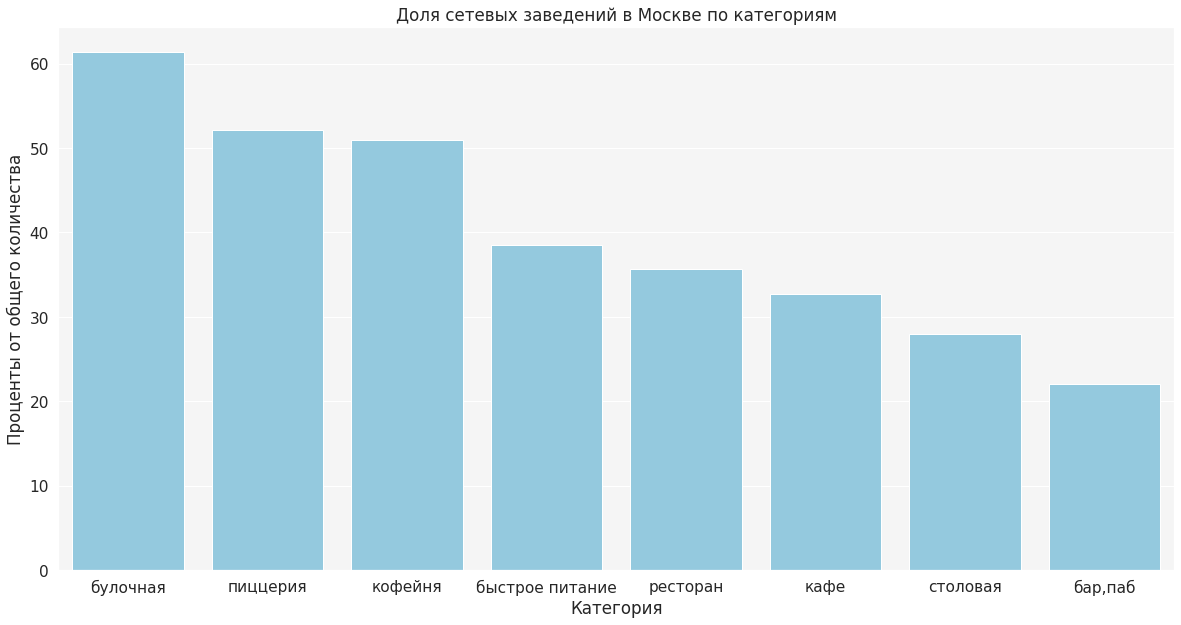

In [23]:
( 
    sns.barplot(data=chain1_cat, x='категория', 
                y='доля от общего количество',
                order=chain1_cat.sort_values(by='доля от общего количество', ascending=False)['категория'],
                color='#87CEEB')
    .set(xlabel='Категория',
         ylabel='Проценты от общего количества',
         title='Доля сетевых заведений в Москве по категориям')
)    

Среди сетевых заведений популярными категориями являются: кафе, рестораны, кофейни

__ТОП-15 популярных сетей Москвы__

In [24]:
top_15_chain = (
    
    df.query('chain == 1')
    .groupby('name', as_index=False)['category'].count()
    .rename(columns={'name':'названия заведений', 'category':'количество'})
    .sort_values(by='количество', ascending=False)
    .head(15)
               )
top_15_chain

названия заведений  количество
746                          Шоколадница         120
344                       Домино'с Пицца          76
340                           Додо Пицца          74
148                     One Price Coffee          71
759                         Яндекс Лавка          69
59                                 Cofix          65
170                                Prime          50
679                           Хинкальная          44
378                             КОФЕПОРТ          42
431  Кулинарная лавка братьев Караваевых          39
643                              Теремок          38
699                              Чайхана          37
40                              CofeFest          32
273                              Буханка          32
491                                Му-Му          27

[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Названия заведений'),
 Text(0.5, 1.0, 'Количество ТОП-15 сетевый заведений в Москве по названиям')]

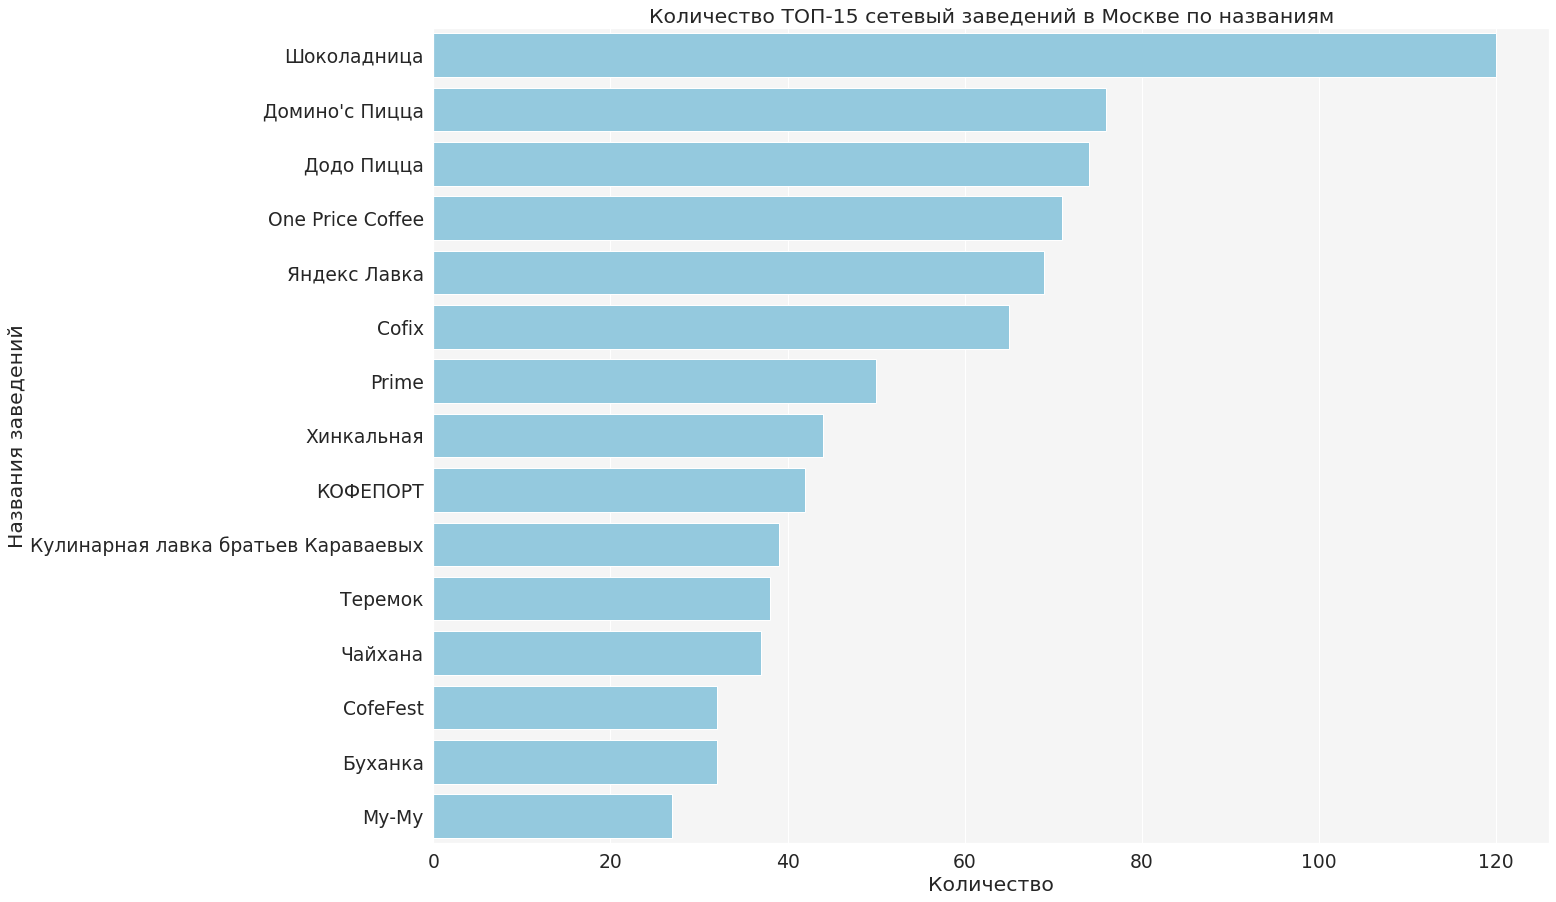

In [25]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,15)}, font_scale=1.7)

(
    sns.barplot(data=top_15_chain, 
            y='названия заведений', 
            x='количество', 
            color='#87CEEB', orient='h')
    .set(xlabel='Количество', 
         ylabel='Названия заведений',
         title='Количество ТОП-15 сетевый заведений в Москве по названиям')
)   

Теперь мы знаем ТОП-15 сетевых заведений Москвы. Это популярные сети заведений общественного питания, среди них есть места, которые пользуются популярностью своими бизнес-ланчами и возможностью быстро и вкусно пообедать в рабочее время, заведения, основой которых является доставка и кофейни.

__Административные округа__

In [26]:
(
    df.groupby('district', as_index=False)['name']
    .count()
    .rename(columns={'district':'округ', 'name':'количество заведений'})
    .sort_values(by='количество заведений', ascending=False)
)    

округ  количество заведений
5       Центральный административный округ                  2242
2          Северный административный округ                   900
8             Южный административный округ                   892
3  Северо-Восточный административный округ                   891
1          Западный административный округ                   851
0         Восточный административный округ                   798
6     Юго-Восточный административный округ                   714
7      Юго-Западный административный округ                   709
4   Северо-Западный административный округ                   409

[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Округ'),
 Text(0.5, 1.0, 'Количество заведений по округам')]

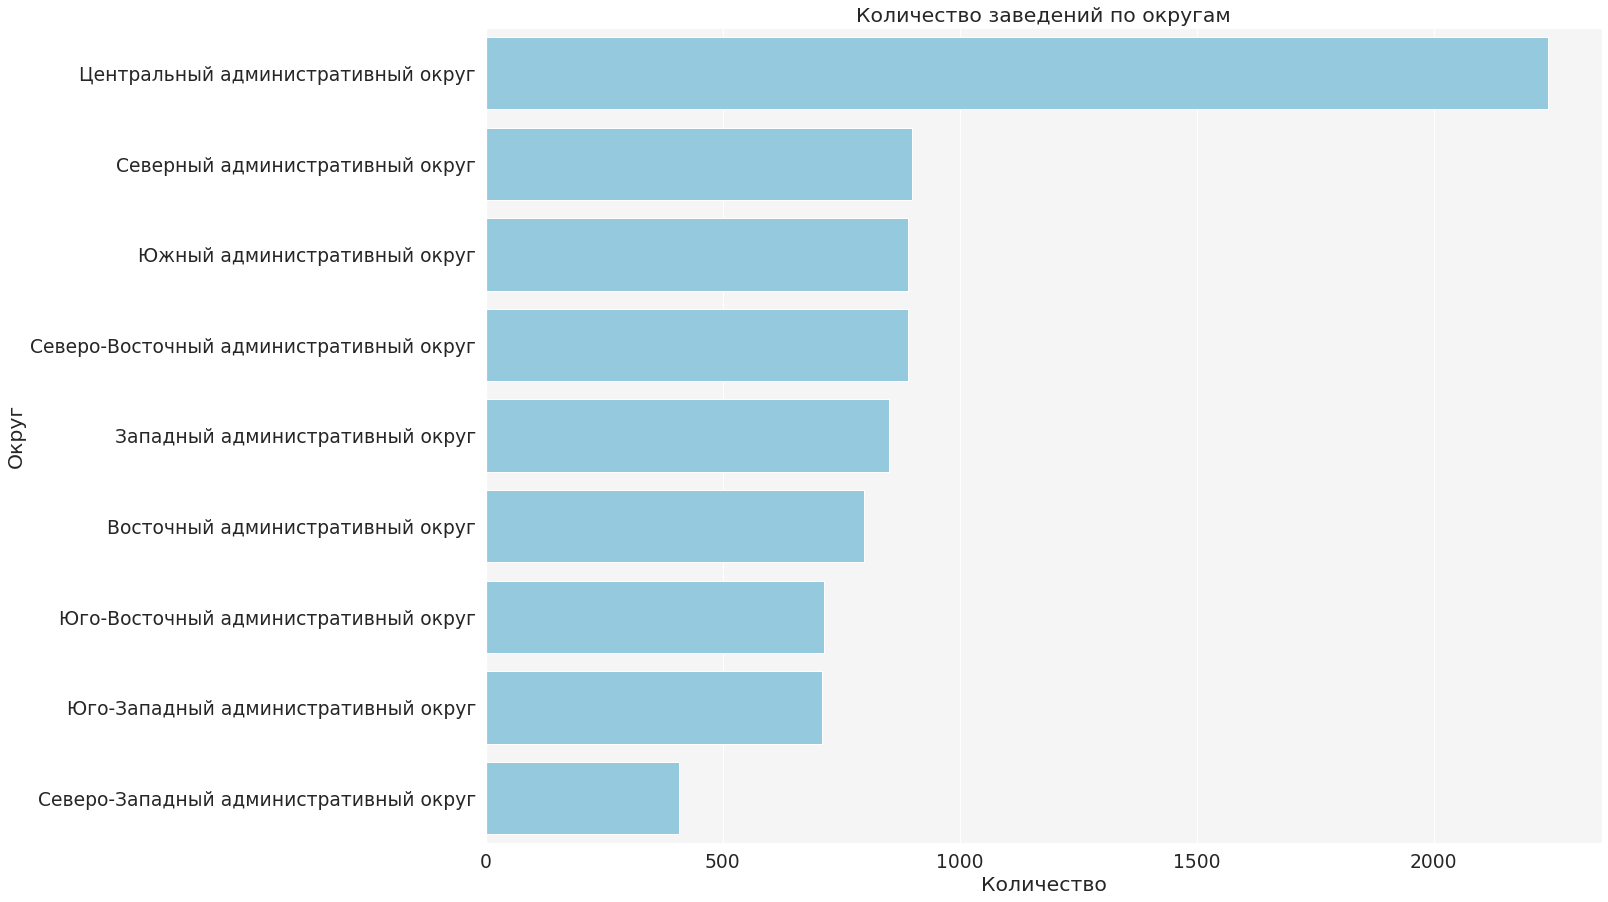

In [27]:
(
sns.countplot(data=df, y='district', 
              order=df.groupby('district')['name'].count()
                      .sort_values(ascending=False).index,
              color='#87CEEB')
.set(xlabel='Количество',
     ylabel='Округ',
     title='Количество заведений по округам')
)   


[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Округ'),
 Text(0.5, 1.0, 'Количество заведений по округам')]

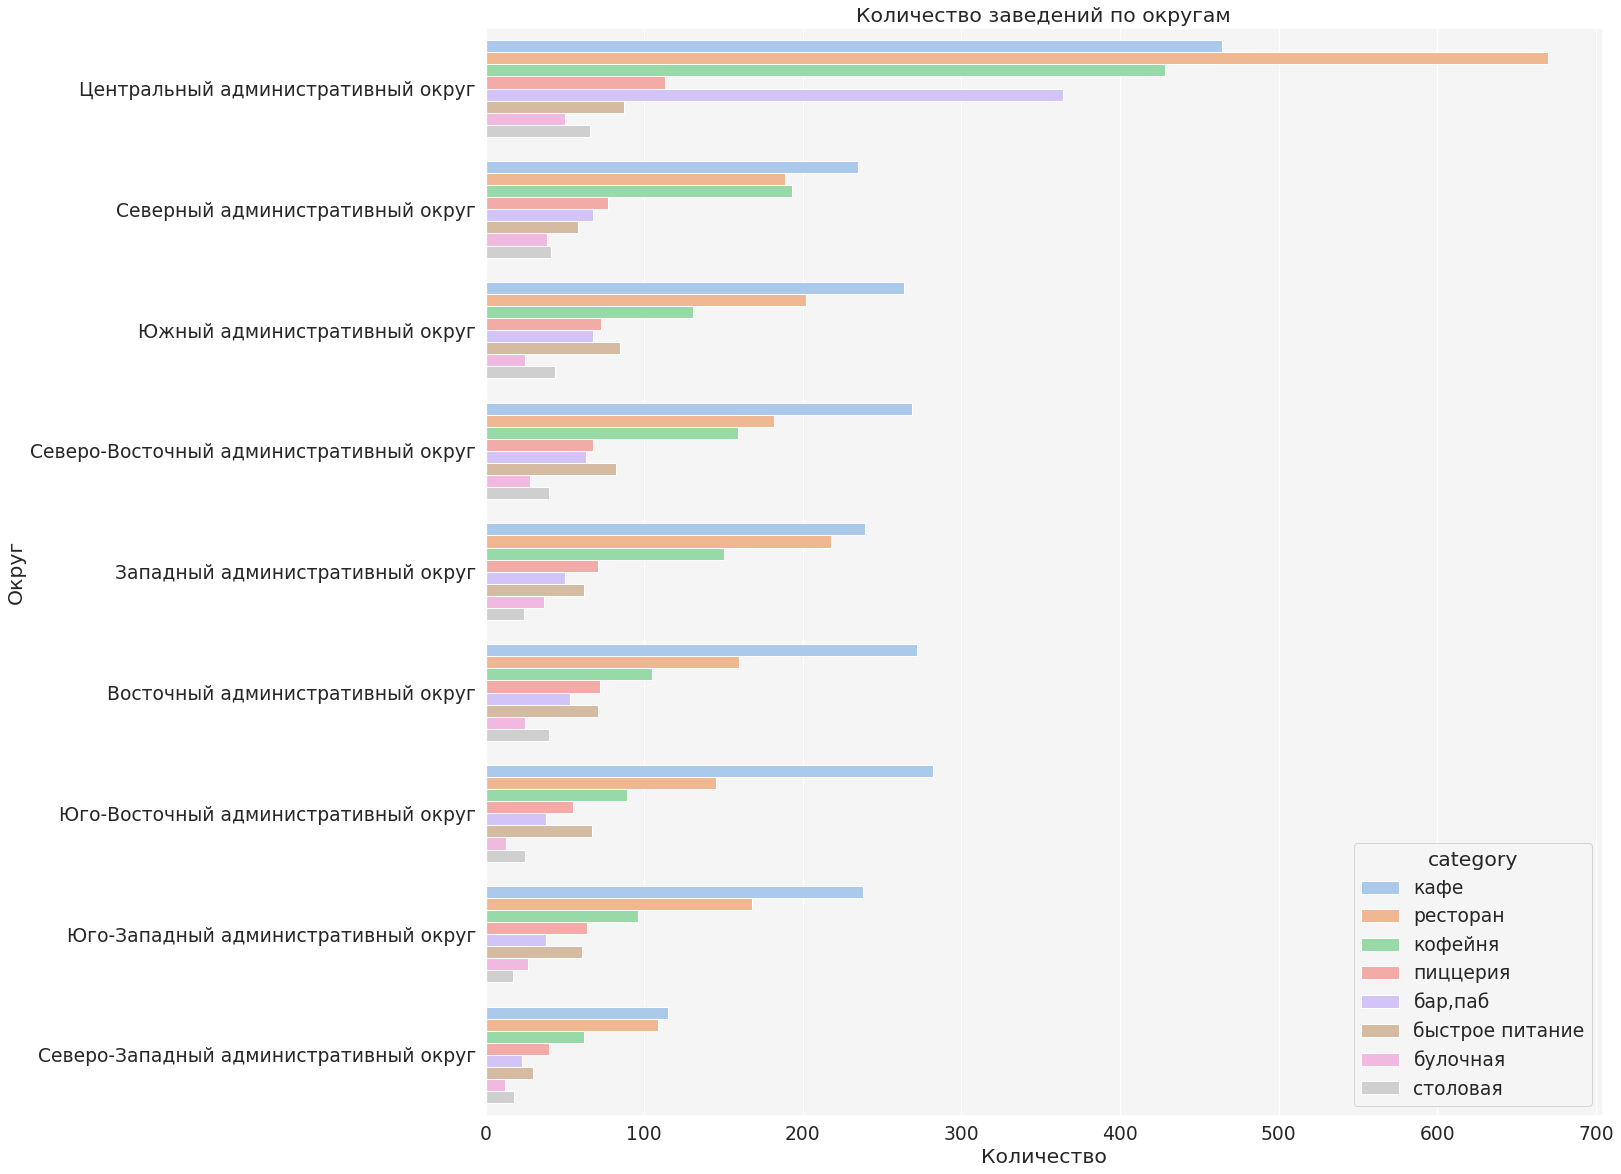

In [28]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,20)}, font_scale=1.7)

(
sns.countplot(data=df, y='district', 
              order=df.groupby('district')['name'].count()
                      .sort_values(ascending=False).index,
              hue='category', palette='pastel')
.set(xlabel='Количество',
     ylabel='Округ',
     title='Количество заведений по округам')
)    

Больше всего заведений находится в Центральном административном округе, на втором месте Северный административный округ и третье место занимает Южный административный округ. 

Рассматривая разбивку по категориям в каждом округе, можно увидеть, что в ЦАО больше всего находится ресторанов, в САО и ЮАО - кафе.

__Средний рейтинг__

Посмотрим на распределение рейтинга по категориям

[Text(0.5, 0, 'Рейтинг'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Распределение рейтинга по категориям')]

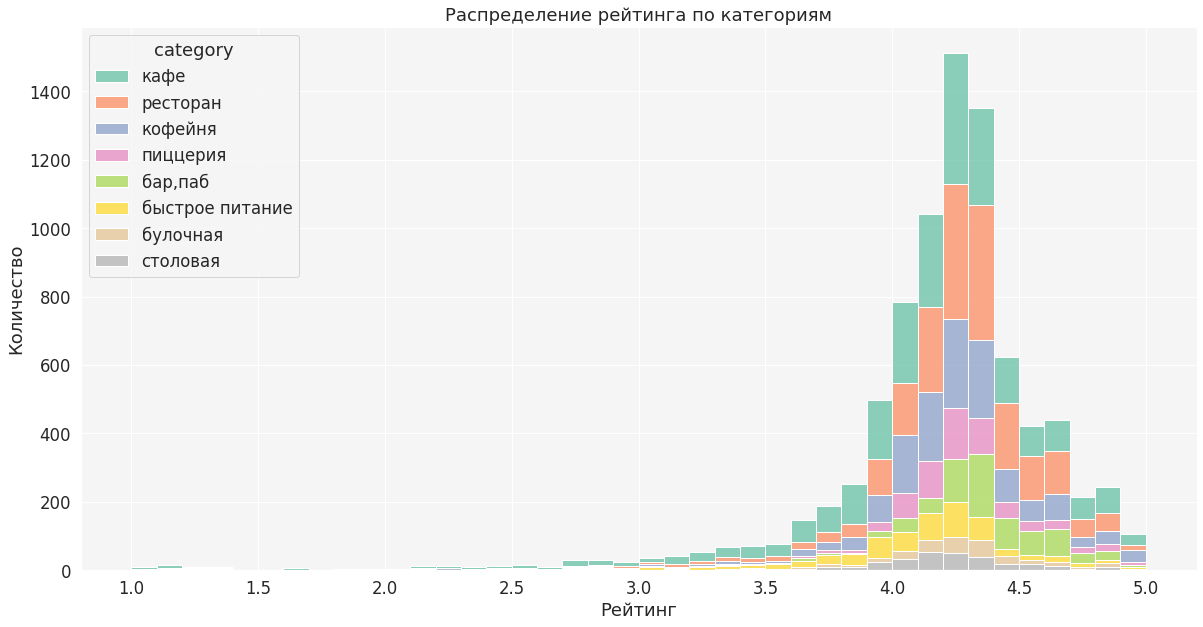

In [29]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale=1.5)
(
    sns.histplot(df, x='rating', 
                 hue='category', palette=("Set2"), 
                 binwidth=0.1, multiple='stack')
    .set(xlabel='Рейтинг',
         ylabel='Количество',
         title='Распределение рейтинга по категориям')
)    

Теперь на средний рейтинг по категориям

In [30]:
(
    df.groupby('category', as_index=False)['rating']
    .mean()
    .rename(columns={'category':'категория', 'rating':'рейтинг'})
    .sort_values(by='рейтинг', ascending=False)
)    

категория  рейтинг
0          бар,паб     4.39
5         пиццерия     4.30
6         ресторан     4.29
4          кофейня     4.28
1         булочная     4.27
7         столовая     4.21
3             кафе     4.12
2  быстрое питание     4.05

[Text(0.5, 0, 'Средний рейтинг'),
 Text(0, 0.5, 'Категории'),
 Text(0.5, 1.0, 'Средний рейтинг по категориям')]

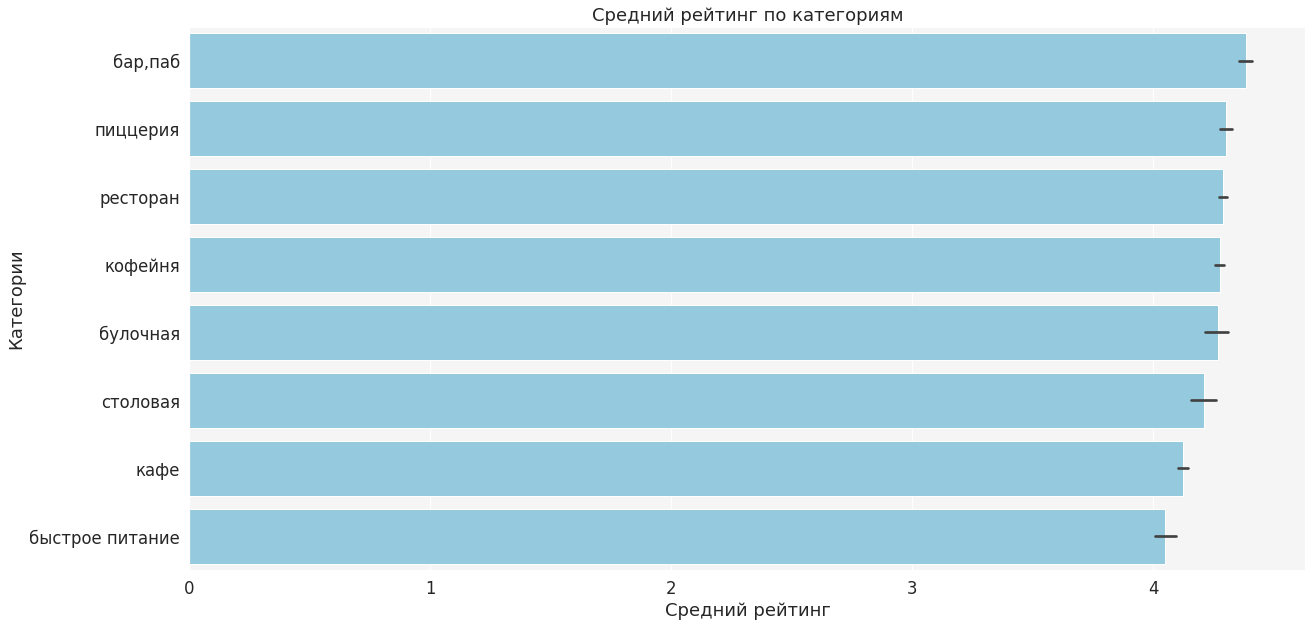

In [31]:
(
    sns.barplot(data=df, x='rating', y='category',
               color='#87CEEB', 
               order=df.groupby('category')['rating'].mean().sort_values(ascending=False).index)
    .set(xlabel='Средний рейтинг',
         ylabel='Категории',
         title='Средний рейтинг по категориям')
)    

Средний рейтинг по категориям не сильно отличается друг от друга, лидерами по среднему рейтингу являются заведения категории "бар,паб"

__Хороплет со средний рейтингом по районам__

In [32]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean')
rating_df

district  rating
0         Восточный административный округ    4.17
1          Западный административный округ    4.18
2          Северный административный округ    4.24
3  Северо-Восточный административный округ    4.15
4   Северо-Западный административный округ    4.21
5       Центральный административный округ    4.38
6     Юго-Восточный административный округ    4.10
7      Юго-Западный административный округ    4.17
8             Южный административный округ    4.18

In [33]:
with open('/datasets/admin_level_geomap.geojson', 'r', encoding='utf8') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            [
              [
                37.8756653,
                55.825342400000004
              ],
              [
                37.876001599999995,
                55.8249027
              ],
              [
                37.8730967,
                55.8237936
              ],
              [
                37.8689418,
                55.8228697
              ],
              [
                37.869206999999996,
                55.822363200000005
              ],
              [
                37.868322500000005,
                55.822211100000004
              ],
              [
                37.867472,
                55.823703
              ],
              [
                37.86851090000001,
                55.82391880000001
              ],
              [
                37.87046039999999,
                55.8242706
              ],
              [
                37.87172779999

In [34]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m

In [35]:
def create_marker(row):
    folium.Marker([row['lat'], row['lng']],
    popup=f"{row['name']} {row['rating']}"
    ).add_to(m)

df.apply(create_marker, axis=1)
#m

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
34      None
35      None
36      None
37      None
38      None
39      None
40      None
41      None
42      None
43      None
44      None
45      None
46      None
47      None
48      None
49      None
50      None
51      None
52      None
53      None
54      None
55      None
56      None
57      None
58      None
59      None
60      None
61      None
62      None
63      None
64      None
65      None
66      None
67      None
68      None
69      None
70      None
71      None
72      None
73      None
74      None
75      None
76      None

__ТОП-15 улиц по количеству заведений__

Посмотрим ТОП-15 улиц по количеству заведений

In [36]:
(
    df.groupby('street')['name'].count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'street':'название улицы', 'name':'количество'})
    .head(15)
)    

название улицы  количество
0            проспект Мира         184
1        Профсоюзная улица         122
2     проспект Вернадского         108
3       Ленинский проспект         107
4   Ленинградский проспект          95
5        Дмитровское шоссе          88
6          Каширское шоссе          77
7         Варшавское шоссе          76
8      Ленинградское шоссе          70
9                     МКАД          65
10        Люблинская улица          60
11          улица Вавилова          55
12    Кутузовский проспект          54
13    улица Миклухо-Маклая          49
14         Пятницкая улица          48

Теперь посмотрим в разрезе категорий

In [37]:
top_15_str = df.groupby('street')['name'].count().sort_values(ascending=False).head(15).index

In [38]:
top_15_str

Index(['проспект Мира', 'Профсоюзная улица', 'проспект Вернадского',
       'Ленинский проспект', 'Ленинградский проспект', 'Дмитровское шоссе',
       'Каширское шоссе', 'Варшавское шоссе', 'Ленинградское шоссе', 'МКАД',
       'Люблинская улица', 'улица Вавилова', 'Кутузовский проспект',
       'улица Миклухо-Маклая', 'Пятницкая улица'],
      dtype='object', name='street')

[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Улица'),
 Text(0.5, 1.0, 'Количество заведений по категориям')]

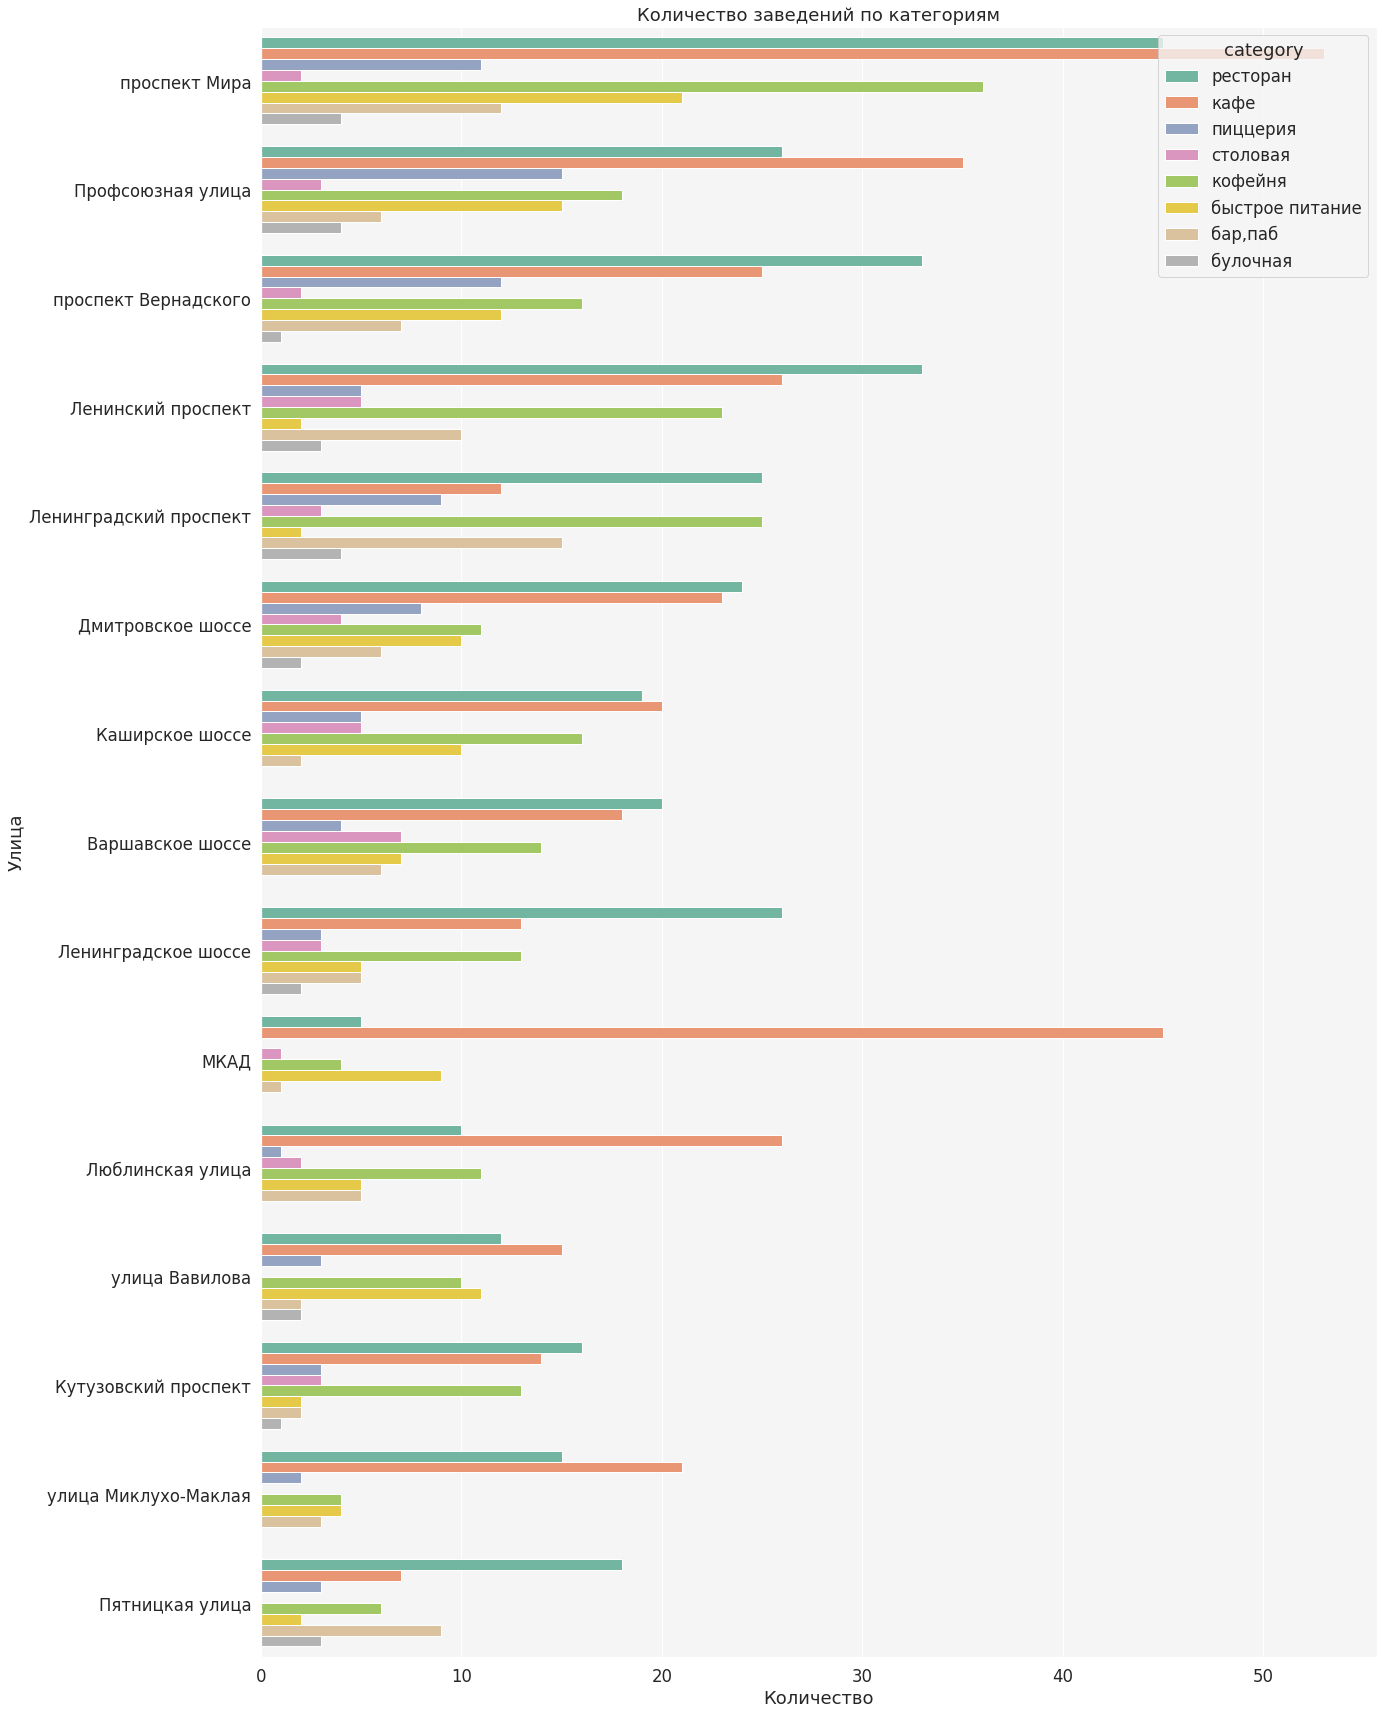

In [39]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,30)}, font_scale=1.5)
(
    sns.countplot(data=df.query('street in @top_15_str'), 
                 y='street', hue='category', order=top_15_str,
                 palette='Set2')
    .set(xlabel='Количество',
         ylabel='Улица',
         title='Количество заведений по категориям')
)    

[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Улица'),
 Text(0.5, 1.0, 'Количество заведений по категориям')]

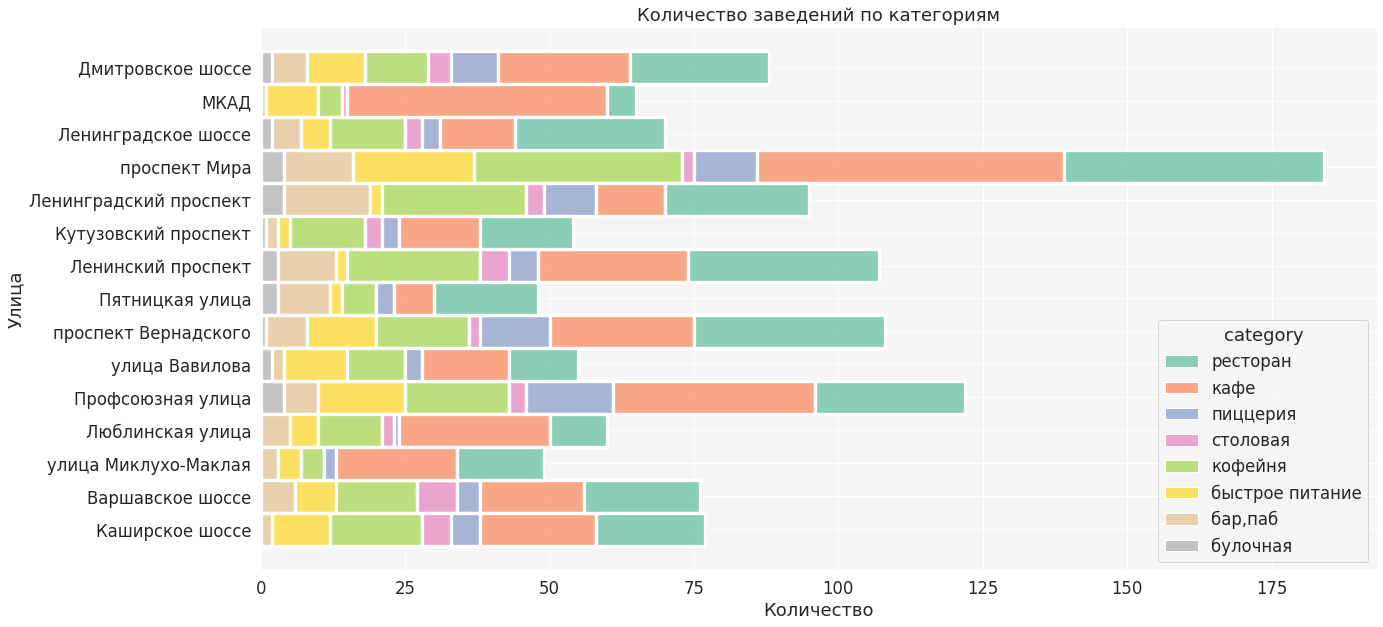

In [40]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale=1.5)
(
    sns.histplot(df.query('street in @top_15_str'), 
                 y='street', hue='category', 
                 multiple='stack', palette='Set2')
    .set(xlabel='Количество',
         ylabel='Улица',
         title='Количество заведений по категориям')
)    

Интересно еще будет взглянуть какие категории наиболее популярны среди ТОП-15 улиц

In [41]:
cat_top_15 = (
    df.query('street in @top_15_str')
    .groupby('category')['name']
    .count()
    .reset_index()
    .rename(columns={'category':'категория', 'name':'количество'})
    .sort_values(by='количество', ascending=False)
             ) 

In [42]:
cat_top_15

категория  количество
3             кафе         353
6         ресторан         327
4          кофейня         220
2  быстрое питание         117
0          бар,паб          91
5         пиццерия          84
7         столовая          40
1         булочная          26

In [43]:
px.pie(cat_top_15, values='количество', names='категория')

Мы рассмотрели ТОП-15 улиц по количеству заведений и можно выявить лидира - проспект Мира, на нём находится 184 заведения, около 50% занимают кафе и рестораны.

Так же мы выяснили, самые популярные категории заведений на улицах из ТОП-15: кафе, рестораны и кофейни. 

__Улицы с одним заведением__

In [44]:
(
    df.groupby('street')['name']
    .count()
    .sort_values(ascending=True)
    .reset_index()
    .rename(columns={'street':'название улицы', 'name':'количество'})
)

название улицы  \
0                                                1-й Автозаводский проезд   
1                                                       Одинцовская улица   
2                                                    Октябрьский переулок   
3                                                         Ордынский тупик   
4                                                      Оренбургская улица   
5                                                      Орловский переулок   
6                                                         Оршанская улица   
7                                                         Островная улица   
8                                                    Новоясеневский тупик   
9                                                         Отрадный проезд   
10                                                Панкратьевский переулок   
11                                                        Парусный проезд   
12                                                     Певческий переулок   
13                                               Переведеновский переулок   
14                                                      Перекопская улица   
15                                                         Пермская улица   
16                                       Перовский парк культуры и отдыха   
17                                                  Павелецкая набережная   
18                                                    Новощукинская улица   
19                                                    Новосущёвская улица   
20                                                   Новороссийская улица   
21                                            Малый Толмачёвский переулок   
22                                                  Мансуровский переулок   
23                                                       Медовый переулок   
24                                                 Мерзляковский переулок   
25                                                       Миусская площадь   
26                                                    Михайловский проезд   
27                                                       Молдавская улица   
28                                                Москворецкая набережная   
29                                                       Московская улица   
30                                                    Московский проспект   
31                                                      Мурановская улица   
32                                                       Мясницкий проезд   
33                                                   Нащокинский переулок   
34                                                            Новая улица   
35                                                     Новгородская улица   
36                                                   Новомосковская улица   
37                                                   Новопоселковая улица   
38                                                    Пестовский переулок   
39                                                Петроверигский переулок   
40                                            Петровско-Разумовская аллея   
41                                                       Платовская улица   
42                                                 Симферопольский проезд   
43                                                    Скатертный переулок   
44                                                   Скотопрогонная улица   
45                                              Смоленская-Сенная площадь   
46                                                        Советская улица   
47                                                        Солянский тупик   
48                                                   Софийская набережная   
49                                             Средний Тишинский переулок   
50                                                   Ставропольская улица   
51                                                  Ста

In [45]:
street_one = (
    df.groupby('street')['name']
    .count()
    .sort_values(ascending=True)
    .to_frame()
).query('name == 1').index

In [46]:
cat_one_str = (
    df.query('street in @street_one')
    .groupby('category')['name']
    .count().reset_index()
    .rename(columns={'category':'категория', 'name':'количество'})
)

In [47]:
px.pie(cat_one_str, values='количество', 
       names='категория', title='Категории на улицах с одним заведением')

На улицах с одним заведением в основном располагаются кафе, рестораны или кофейни

__Медианное значение средних чеков по районам__

Средний чек показывает примерную стоимость заведения, посмотрим медианные значения среднего чека по округам

In [48]:
avg_bill_df = df.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
avg_bill_df

district  middle_avg_bill
0         Восточный административный округ           575.00
1          Западный административный округ         1,000.00
2          Северный административный округ           650.00
3  Северо-Восточный административный округ           500.00
4   Северо-Западный административный округ           700.00
5       Центральный административный округ         1,000.00
6     Юго-Восточный административный округ           450.00
7      Юго-Западный административный округ           600.00
8             Южный административный округ           500.00

In [49]:
# создаём карту Москвы
mm = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=avg_bill_df,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианное значение среднего чека по районам',
).add_to(mm)

# выводим карту
#mm

Можно сделать вывод, что самые дорогие заведения находятся в ЦАО и ЗАО

__Вывод__

Судя по данным в Москве большую часть заведений составляют: кафе, рестораны и кофейни. В барах/пабах, ресторанах и кофейнях в среднем больше посадочных мест чем в других заведениях. 62% заведений относятся к сетевым заведениям. Среди сетевых заведений топ-3 составляют: кафе, рестораны и кофейни. Среди сетевых заведений пользуются спросом заведения ориентированные на доставку и на комплексные и недорогие приёмы пищи. Больше всего заведений находится в ЦАО, здесь же заведения имеют самый высокий средний рейтинг и самые дорогие чеки.

В Москве высокая конкуренция и неудивительно, что многие заведения открываются по франшизе под уже известными брендами. Но есть перспективные округа, где есть возможность открыть заведение. Например, СЗАО. Как мы выяснили москивчам нравятся заведения ориентированные на доставку и заведения с недорогой и вкусной едой. В СЗАО очень мало пиццерий по сравнению с другими округами. В связи с этим имеет смысл рассмотреть вариант с приобретением популярной франшизы, например, Додо пицца или Доминос и открыть заведение в этом округе.

### Детализируем исследование: открытие кофейни

Основатели фонда решили открыть кофейню, не взирая на конкуренцию, попробуем определить осуществима ли их мечта

Для этого ответим на следующие вопросы:

* Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
* Есть ли круглосуточные кофейни?
* Какие у кофеен рейтинги? Как они распределяются по районам?
* На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

__Количество кофеен__

Посмотрим сколько всего кофеейн в наших данных

In [50]:
print('Количество кофеен в данных:', len(df.query('category == "кофейня"')))

Количество кофеен в данных: 1413


Общее количество мы знаем, теперь посмотрим количество кофеен по округам

In [51]:
(
    df.query('category == "кофейня"')
    .groupby('district', as_index=False)['name']
    .count()
    .sort_values(by='name',ascending=False)
    .rename(columns={'district':'округ', 'name':'количество'})
)    

округ  количество
5       Центральный административный округ         428
2          Северный административный округ         193
3  Северо-Восточный административный округ         159
1          Западный административный округ         150
8             Южный административный округ         131
0         Восточный административный округ         105
7      Юго-Западный административный округ          96
6     Юго-Восточный административный округ          89
4   Северо-Западный административный округ          62

[Text(0.5, 0, 'Количество'),
 Text(0, 0.5, 'Округ'),
 Text(0.5, 1.0, 'Количество кофеен по округам')]

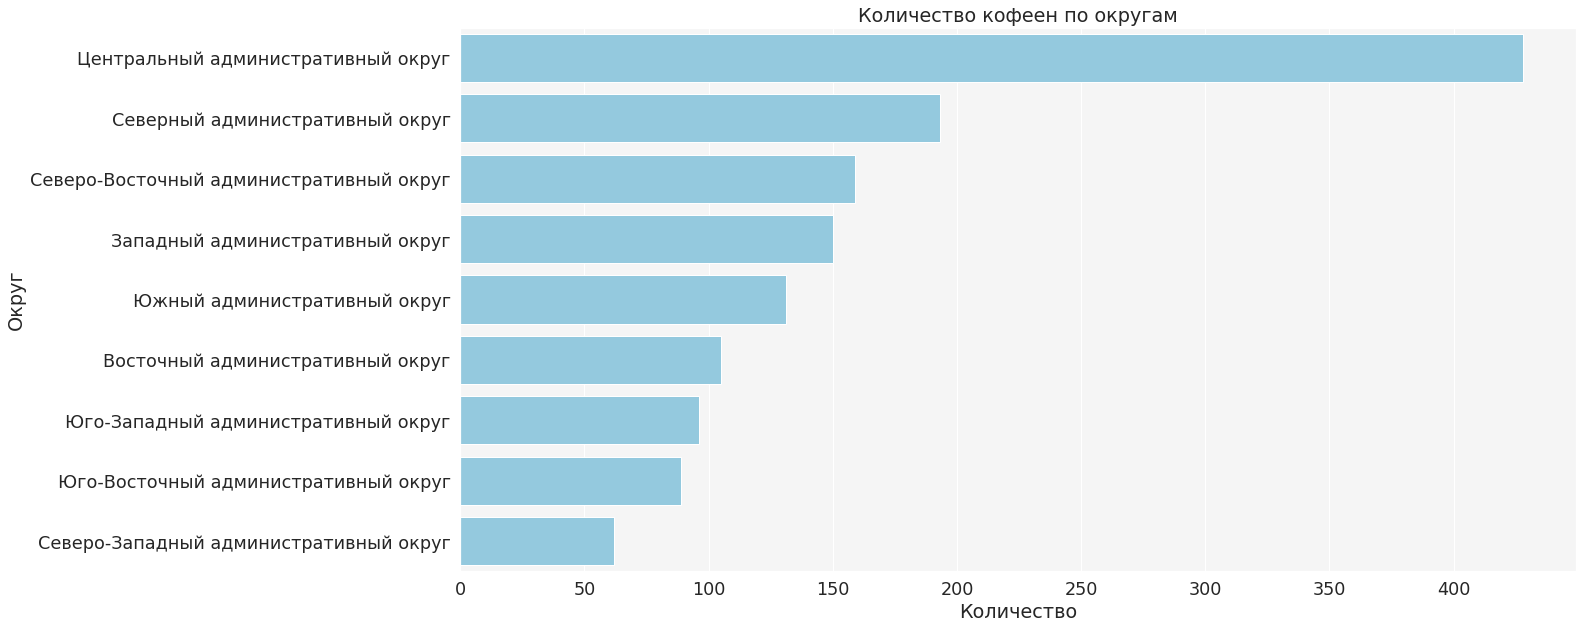

In [52]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale=1.6)
(
    sns.countplot(data=df.query('category == "кофейня"'), 
                  y='district', 
                  order=df.query('category == "кофейня"')
                          .groupby('district')['name'].count()
                          .sort_values(ascending=False).index,
                  color='#87CEEB')
    .set(xlabel='Количество',
         ylabel='Округ',
         title='Количество кофеен по округам')
)    

Больше всего кофеен расположено в ЦАО, за ним идет САО и СВАО  

__Круглосуточные кофейни__

In [53]:
print('Количество круглосуточных кофеен:', len(df.query('category == "кофейня" and is_24_7 == 1')))

Количество круглосуточных кофеен: 59


In [54]:
(
    px.pie(df.query('category == "кофейня"')
           .groupby('is_24_7', as_index=False)['name']
           .count(), values='name', names='is_24_7')
)    

Круглосуточных кофеен совсем немного, всего около 4% от общего числа кофеен

__Рейтинги у кофеен__

Узнаем как распределён рейтинг среди кофеен

[Text(0.5, 0, 'Рейтинг'),
 Text(0, 0.5, 'Количество'),
 Text(0.5, 1.0, 'Распределение рейтинга кофеен')]

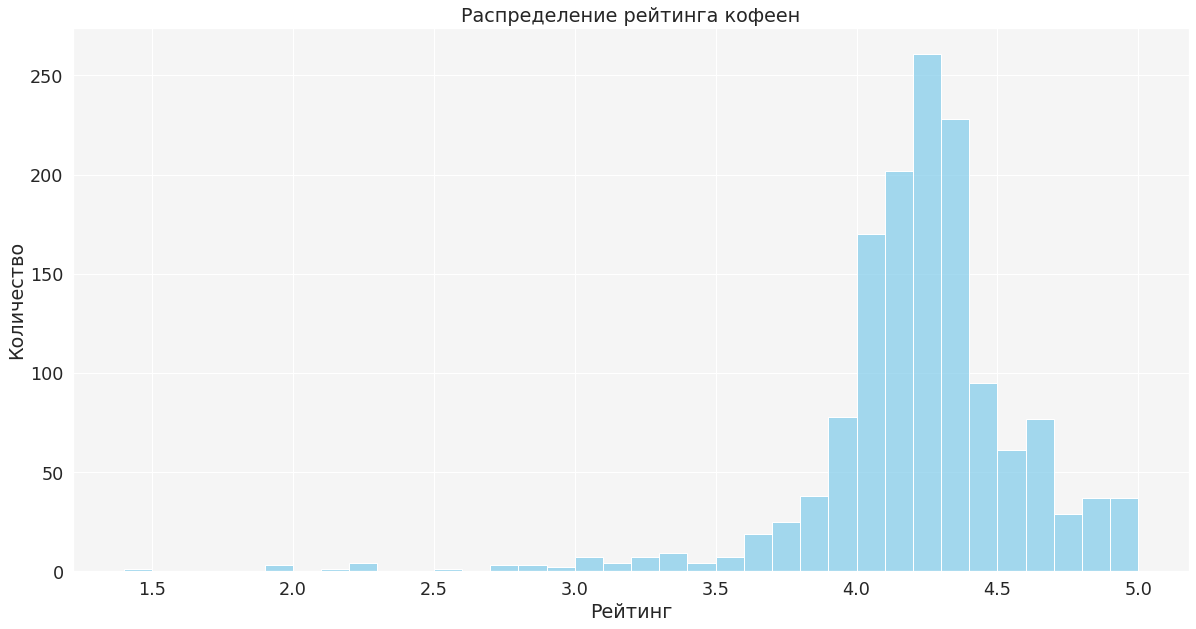

In [55]:
(
    sns.histplot(df.query('category == "кофейня"'), 
                 x='rating', binwidth=0.1, color='#87CEEB')
    .set(xlabel='Рейтинг',
         ylabel='Количество',
         title='Распределение рейтинга кофеен')
)    

[Text(0, 0.5, 'Рейтинг'), Text(0.5, 1.0, 'Распределение рейтинга кофеен')]

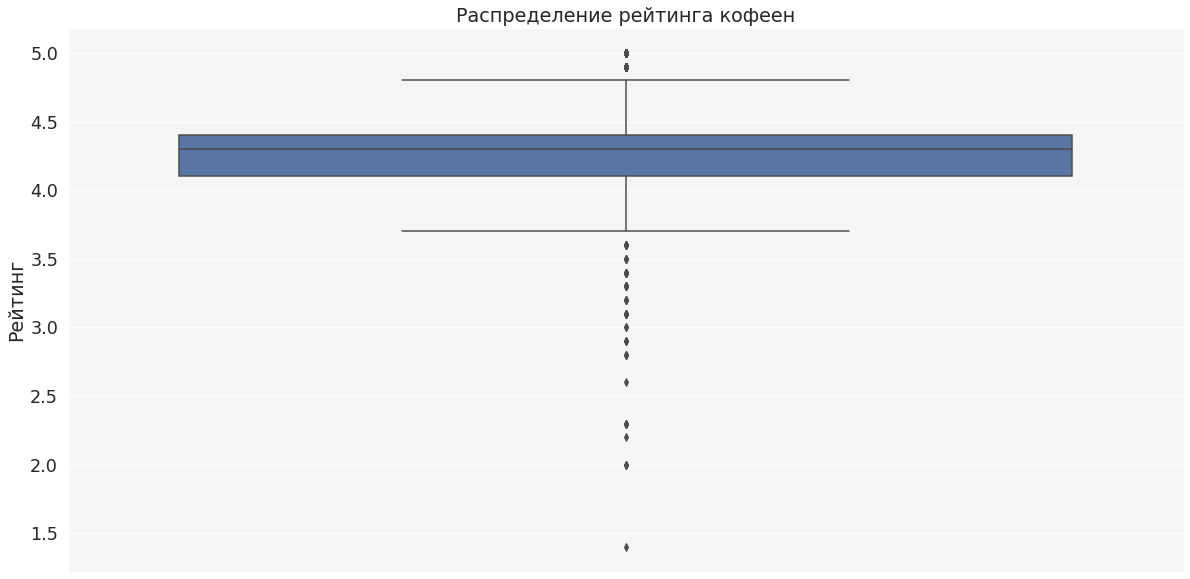

In [56]:
(
    sns.boxplot(data=df.query('category == "кофейня"'), y='rating')
    .set(ylabel='Рейтинг', title='Распределение рейтинга кофеен')
)    

Большинство кофеен имеет рейтинг от 4 до 4.5

Теперь рассмотрим средний рейтинг кофеен по округам

In [57]:
(
    df.query('category == "кофейня"')
    .groupby('district', as_index=False)['rating']
    .mean()
    .rename(columns={'district':'округ', 
                     'rating':'средний рейтинг'})
    .sort_values(by='средний рейтинг', ascending=False)
)    

округ  средний рейтинг
5       Центральный административный округ             4.34
4   Северо-Западный административный округ             4.33
2          Северный административный округ             4.29
7      Юго-Западный административный округ             4.28
0         Восточный административный округ             4.28
8             Южный административный округ             4.23
6     Юго-Восточный административный округ             4.23
3  Северо-Восточный административный округ             4.22
1          Западный административный округ             4.20

[Text(0.5, 0, 'Средний рейтинг'),
 Text(0, 0.5, 'Округ'),
 Text(0.5, 1.0, 'Средний рейтинг кофеен по округам')]

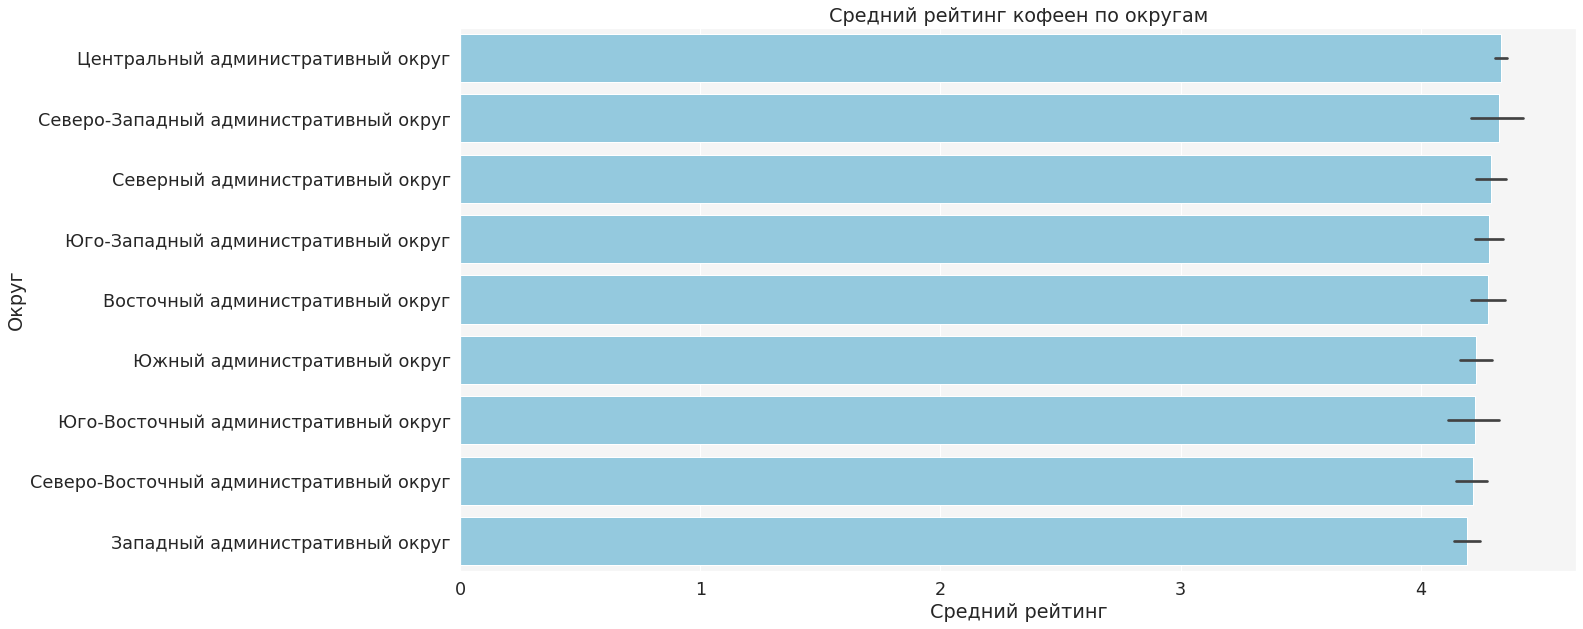

In [58]:
(
    sns.barplot(data=df.query('category == "кофейня"'), 
                y='district', x='rating', 
                color='#87CEEB', 
                order=df.query('category == "кофейня"')
                        .groupby('district')['rating'].mean()
                        .sort_values(ascending=False).index)
    .set(xlabel='Средний рейтинг',
         ylabel='Округ',
         title='Средний рейтинг кофеен по округам')
)

В ЦАО находятся кофейня с самым высоким рейтингом

__Стоимость чашки капучино__

Инвесторы хотят определить на какую стоимость чашки капучино стоит ориентироваться при открытии кофейни. Для того, чтобы ответить на этот вопрос посмотрим на средние цены по округам.

In [59]:
(
    df.query('category == "кофейня"')
    .groupby('district', as_index=False)['middle_coffee_cup']
    .mean()
    .rename(columns={'district':'округ', 
                     'middle_coffee_cup':'средняя стоимость чашки капучино'})
    .sort_values(by='средняя стоимость чашки капучино', ascending=False)
)    

округ  средняя стоимость чашки капучино
1          Западный административный округ                            189.94
5       Центральный административный округ                            187.52
7      Юго-Западный административный округ                            184.18
0         Восточный административный округ                            174.02
2          Северный административный округ                            165.79
4   Северо-Западный административный округ                            165.52
3  Северо-Восточный административный округ                            165.33
8             Южный административный округ                            158.49
6     Юго-Восточный административный округ                            151.09

[Text(0.5, 0, 'Средняя стоимость чашки капучино'),
 Text(0, 0.5, 'Округ'),
 Text(0.5, 1.0, 'Средняя стоимость чашки капучино по округам')]

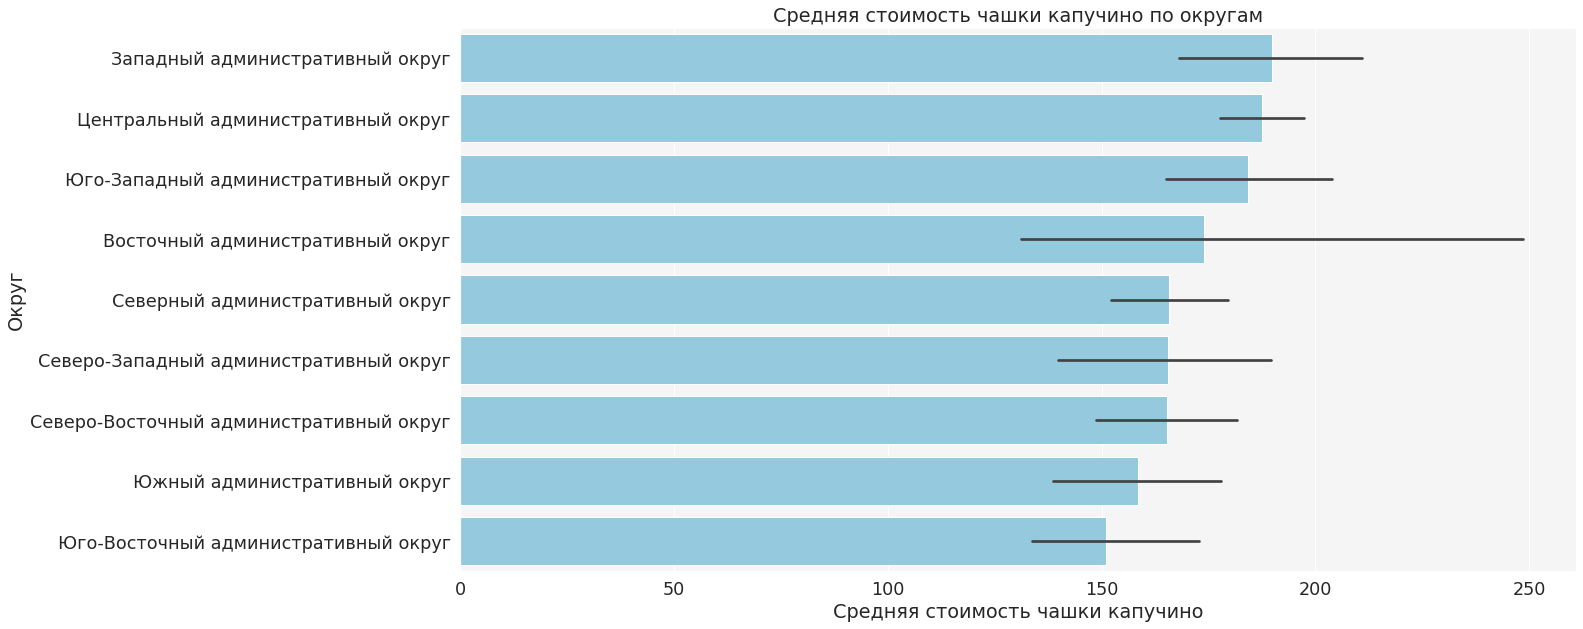

In [60]:
(
    sns.barplot(data=df.query('category == "кофейня"'), 
                x='middle_coffee_cup', y='district',
                order=df.query('category == "кофейня"')
                         .groupby('district')['middle_coffee_cup']
                         .mean()
                         .sort_values(ascending=False)
                         .index,
                color='#87CEEB')
    .set(xlabel='Средняя стоимость чашки капучино',
         ylabel='Округ',
         title='Средняя стоимость чашки капучино по округам')
)

В среднем цена на кофе самая высокая в ЗАО.

__Вывод__


Порекомендовать точную стоимость чашки капучино по имеющимся данным невозможно, так как слишком много неучтенных в данных факторов будут влиять на стоимость. Например, затраты на запуск бизнеса, ожидаемый срок окупаемости, конкуренция и тд.

Для начала инвесторам потребуется выбрать между открытием кофейни по франшизе или под собственным брендом. 

Открытие кофейни под популярным брендом может дать конкурентное преимущество и готовую бизнес модель. Но открытие кофейни под собственным брендом даёт возможность поставлять на рынок эксклюзивный продукт.

Выбор расположение также будет влиять на стоимость кофе, например, в ЦАО очень высокая конкурентность и наверняка очень высокая стоимость аренды помещений, но там же и очень большой поток покупателей.

В связи с этим для того чтобы оценить какую стоимость кофе стоит установить, потребуется больше данных чем имеем сейчас.


Презентация https://disk.yandex.ru/i/j1O6LiYoEhkU-w